In [1]:
import matplotlib as mpl
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

import fastf1 as ff1

In [2]:
year = 2021
wknd = 17
ses = 'R'
driver = 'HAM'
colormap = mpl.cm.plasma

In [3]:
session = ff1.get_session(year, wknd, ses)
weekend = session.event
session.load()
lap = session.laps.pick_driver(driver).pick_lap(2)

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on

req         WARNING 	DEFAULT CACHE ENABLED! (716.22 MB) /home/rylei/.cache/fastf1
core           INFO 	Loading data for United States Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver  7: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44',

In [4]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

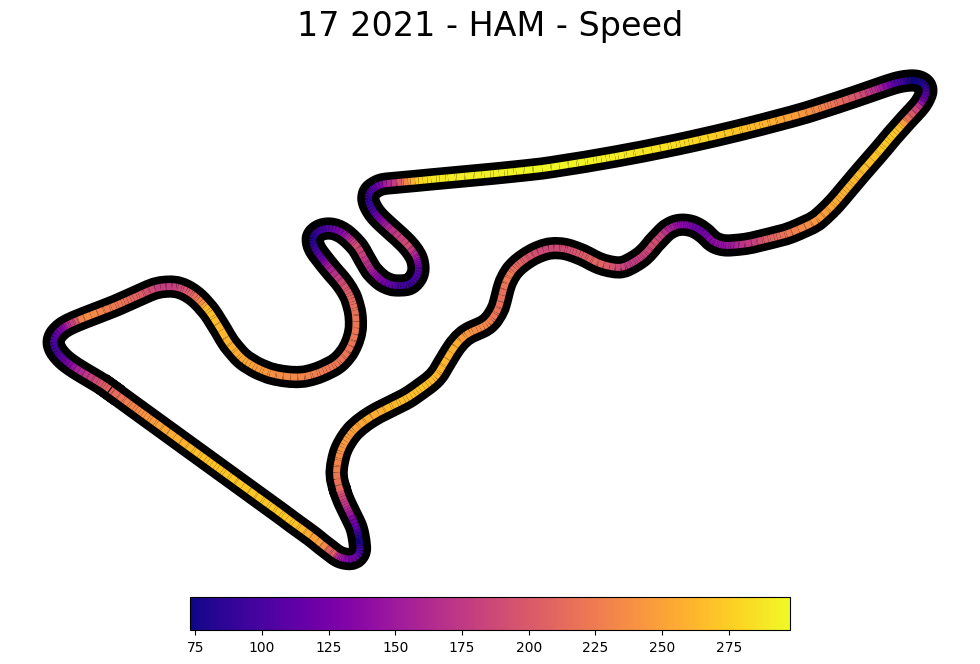

In [5]:
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f'{weekend.name} {year} - {driver} - Speed', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'],
        color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm,
                    linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap,
                                   orientation="horizontal")


# Show the plot
plt.show()

In [6]:
session = ff1.get_session(year, wknd, ses)
session.load()

# Function to retrieve telemetry and compute average for a set of laps
def process_lap_range(session, driver, start_lap, end_lap):
    lap_telemetry_set = pd.DataFrame()

    # Loop through the specified range of laps
    for lap_number in range(start_lap, end_lap + 1):
        lap = session.laps.pick_driver(driver).pick_lap(lap_number)

        if lap is not None:
            lap_telemetry = lap.get_telemetry()  # Ensure telemetry is retrieved correctly

            # Extract telemetry for X, Y, and Speed and append to the DataFrame
            if not lap_telemetry.empty:
                lap_telemetry_filtered = lap_telemetry[['X', 'Y', 'Speed']]
                lap_telemetry_set = pd.concat([lap_telemetry_set, lap_telemetry_filtered], ignore_index=True)
            else:
                print(f"Telemetry data for lap {lap_number} is empty.")
        else:
            print(f"Lap {lap_number} is not available for driver {driver}.")

    # Calculate and return average values if telemetry data is found
    if not lap_telemetry_set.empty:
        average_values = lap_telemetry_set.mean()
        return average_values
    else:
        return None

core           INFO 	Loading data for United States Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver  7: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '11', '16', '3', '77', '55', '4', '22', '5', '99', '18', '7', '63', '6', '47', '9

In [7]:
print("laps 1 to 10")
average_values_set_1 = process_lap_range(session, driver, 1, 10)
if average_values_set_1 is not None:
    print("Average values for X, Y, and Speed across laps 1-10:")
    print(average_values_set_1)
else:
    print("No telemetry data was found for laps 1-10.")

# Processing the second set of laps (11 to 30)
print("laps 11 to 29")
average_values_set_2 = process_lap_range(session, driver, 11, 29)
if average_values_set_2 is not None:
    print("Average values for X, Y, and Speed across laps 11-29:")
    print(average_values_set_2)
else:
    print("No telemetry data was found for laps 11-29.")

print("laps 30 to 56")
average_values_set_2 = process_lap_range(session, driver, 30, 56)
if average_values_set_2 is not None:
    print("Average values for X, Y, and Speed across laps 30-56:")
    print(average_values_set_2)
else:
    print("No telemetry data was found for laps 30-56.")

laps 1 to 10


core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core      

Average values for X, Y, and Speed across laps 1-10:
X        5853.852812
Y        1952.165928
Speed     191.337500
dtype: float64
laps 11 to 29


core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core      

Average values for X, Y, and Speed across laps 11-29:
X        5796.984072
Y        1915.668693
Speed     190.871465
dtype: float64
laps 30 to 56


core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core      

Average values for X, Y, and Speed across laps 30-56:
X        5838.893946
Y        1949.111378
Speed     194.506597
dtype: float64
